In [5]:
#Project goal: Using the data in the link below, attempt to model a customer’s
#propensity to join our loyalty program

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [7]:
df_cus = pd.read_csv("customers_data.csv")
df_cus.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False


In [8]:
#determine if we need to clean up any missing values
missing_values_count = (df_cus.isnull().sum())
print(missing_values_count)

Unnamed: 0               0
purch_amt                0
gender                   0
card_on_file             0
age                      0
days_since_last_purch    0
loyalty                  0
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df_cus['loyalty_codes'] = lb_make.fit_transform(df_cus['loyalty'])
df_cus['gender_codes'] = lb_make.fit_transform(df_cus['gender'])
df_cus['card_on_file_codes'] = lb_make.fit_transform(df_cus['card_on_file'])

df_cus.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,loyalty_codes,gender_codes,card_on_file_codes
0,0,19.58,male,no,31.0,35.0,False,0,1,0
1,1,65.16,male,yes,23.0,61.0,False,0,1,1
2,2,40.60,female,no,36.0,49.0,False,0,0,0
3,3,38.01,male,yes,47.0,57.0,False,0,1,1
4,4,22.32,female,yes,5.0,39.0,False,0,0,1


In [10]:
#verify unique values
df_cus['loyalty_codes'].unique()

array([0, 1])

In [11]:
df_cus.describe()

,Unnamed: 0,purch_amt,age,days_since_last_purch,loyalty_codes,gender_codes,card_on_file_codes
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,59999.500000,44.036234,25.803008,56.605908,0.166667,0.501508,0.500725
std,34641.160489,20.473148,10.153072,16.422187,0.372680,0.500000,0.500002
min,0.000000,-43.950000,-22.000000,-9.000000,0.000000,0.000000,0.000000
25%,29999.750000,30.210000,19.000000,45.000000,0.000000,0.000000,0.000000
50%,59999.500000,43.970000,26.000000,57.000000,0.000000,1.000000,1.000000
75%,89999.250000,57.830000,33.000000,68.000000,0.000000,1.000000,1.000000
max,119999.000000,142.200000,71.000000,125.000000,1.000000,1.000000,1.000000


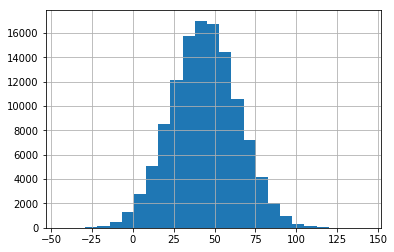

In [12]:
#default bins = 10 
df_cus['purch_amt'].hist(bins=25)
plt.show()

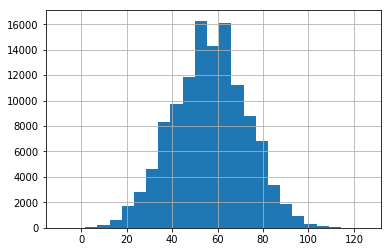

In [13]:
#default bins = 10 
df_cus['days_since_last_purch'].hist(bins=25)
plt.show()

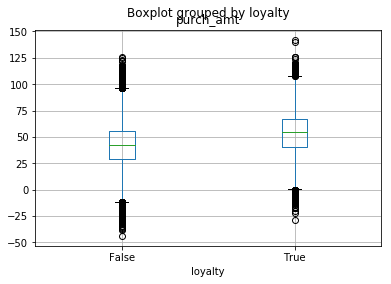

In [14]:
df_cus.boxplot('purch_amt','loyalty')

In [15]:
#take a look at the outliers that are above 90 for loyal customers
df_outliers_pos = df_cus[(df_cus['purch_amt'] >90) & (df_cus['loyalty'] == 1)]
df_outliers_pos.head()


,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,loyalty_codes,gender_codes,card_on_file_codes
9,9,93.63,female,no,40.0,47.0,True,1,0,0
48,48,99.03,male,no,39.0,51.0,True,1,1,0
421,421,96.01,female,yes,25.0,50.0,True,1,0,1
477,477,94.67,female,no,24.0,37.0,True,1,0,0
600,600,94.41,male,yes,19.0,47.0,True,1,1,1


In [16]:
print(df_outliers_pos.shape)

(726, 10)


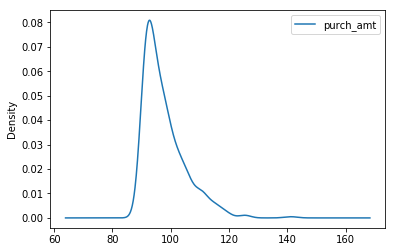

In [118]:
df_outliers_pos.plot(kind='density', x='days_since_last_purch', y='purch_amt', legend=True)
plt.show()

In [19]:
#take a look at the outliers that are below or equal to 0 for loyal customers
df_outliers_neg = df_cus[(df_cus['purch_amt'] <0) & (df_cus['loyalty'] == 1)]
df_outliers_neg.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,loyalty_codes,gender_codes,card_on_file_codes
4720,4720,-1.06,male,no,26.0,47.0,True,1,1,0
6909,6909,-6.47,male,no,34.0,42.0,True,1,1,0
7172,7172,-12.35,female,no,24.0,59.0,True,1,0,0
8746,8746,-14.21,female,yes,37.0,40.0,True,1,0,1
9620,9620,-1.47,male,no,35.0,30.0,True,1,1,0


In [20]:
df_outliers_neg.shape

(84, 10)

In [21]:
#take a look at the outliers that have purchasing amount below 0 and are not loyal customers
df_outliers = df_cus[(df_cus['purch_amt'] <0) & (df_cus['loyalty'] == 0)]
df_outliers.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,loyalty_codes,gender_codes,card_on_file_codes
103,103,-6.79,female,yes,18.0,67.0,False,0,0,1
115,115,-12.85,female,yes,23.0,63.0,False,0,0,1
119,119,-5.00,male,no,23.0,69.0,False,0,1,0
126,126,-3.85,male,no,21.0,51.0,False,0,1,0
163,163,-1.34,female,yes,16.0,45.0,False,0,0,1


In [22]:
df_outliers.shape

(1756, 10)

In [23]:
#count the number of purchase based on the days since last purch. The higher the count and lower the days since
#last purchase would indicate a propensity towards the loyaty program.
df_cus.groupby(['loyalty','days_since_last_purch'])['purch_amt'].count()

loyalty  days_since_last_purch
False    -6.0                       1
         -5.0                       1
         -3.0                       2
         -1.0                       3
          0.0                       1
          3.0                       2
          4.0                       2
          5.0                       2
          6.0                       3
          7.0                       4
          8.0                       9
          9.0                      10
          10.0                      9
          11.0                     16
          12.0                     12
          13.0                     13
          14.0                     17
          15.0                     30
          16.0                     32
          17.0                     40
          18.0                     39
          19.0                     71
          20.0                     75
          21.0                     73
          22.0                    108
          23.0     

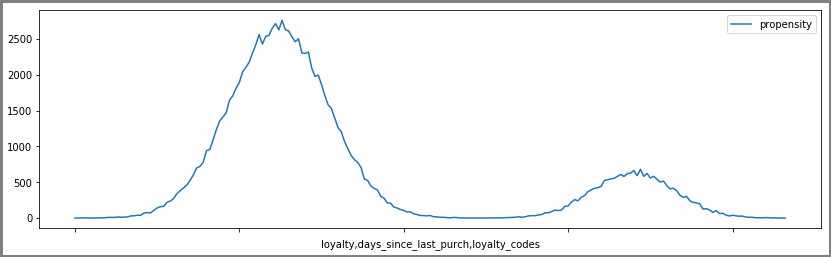

In [24]:
fig, ax = plt.subplots(figsize=(14,4), linewidth=5,edgecolor='.5')    
df_loyal_cus = df_cus.groupby(['loyalty','days_since_last_purch','loyalty_codes'])['purch_amt'].count()
df_loyal_cus.plot(kind='line',label='propensity', legend=True)



In [62]:
#Now let's create our X and Y variable
X = df_cus.drop(['gender', 'card_on_file', 'Unnamed: 0','loyalty_codes', 'loyalty'], axis=1)
#x_train = np.asarray(x_train)
#create our y_train outcome variable 
y = df_cus[['loyalty_codes']]

print(X.shape, y.shape)
#train_columns = x_train.columns

(120000, 5) (120000, 1)


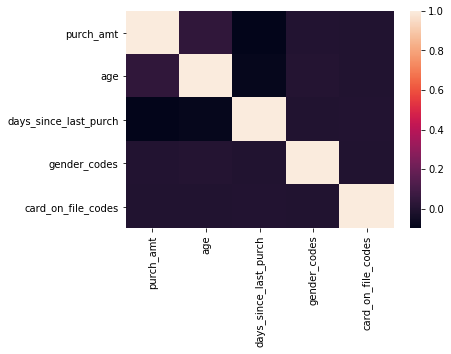

In [63]:
#now that we have all of our numerical data in one table let's review it and determine if our variables
#are correlated with each other
import seaborn as sns
corr = X.corr()
sns.heatmap(corr)

In [65]:
#lets create a traning and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), 
                                                    test_size=0.2, 
                                                    random_state=42)



In [91]:
#find predictions using logistic regression model
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


param_grid = {'C': [6,7,8,9,10,11,12],
             'penalty': ['l1','l2']
             }

scores = ['precision','recall','f1']
for score in scores:
    #print("# Tuning hyper-parameters for %s" %  score)
    print()

lr = LogisticRegression(n_jobs=1)
grid_clf_lr = GridSearchCV(lr, param_grid, cv=3, scoring='%s_macro' % score)

train = grid_clf_lr.fit(X_train, y_train)
y_pred = grid_clf_lr.predict(X_test)

#Print best parameter and training score
print('Best parameter choice for logistic model: {params}'.format(
      params=grid_clf_lr.best_params_, score=grid_clf_lr.best_score_))
print('Training score for the best parameter: {score}'.format(
      params=grid_clf_lr.best_params_, score=grid_clf_lr.best_score_))

print('\n Logistic cufusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Logistic classification report \n',classification_report(y_test,y_pred))  
print('Logistic accuracy score:',accuracy_score(y_test, y_pred))  

#create a result table
data = [{'Model':'Logistic Regression', 'Training score': grid_clf_lr.best_score_,
         'Accuracy': accuracy_score(y_test, y_pred)}]
df_results = pd.DataFrame(data)

df_results






Best parameter choice for logistic model: {'C': 6, 'penalty': 'l1'}
Training score for the best parameter: 0.7179889291265656

 Logistic cufusion matrix 
 [[19156   806]
 [ 2382  1656]]

 Logistic classification report 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     19962
           1       0.67      0.41      0.51      4038

   micro avg       0.87      0.87      0.87     24000
   macro avg       0.78      0.68      0.72     24000
weighted avg       0.85      0.87      0.85     24000

Logistic accuracy score: 0.8671666666666666


,Accuracy,Model,Training score
0,0.867167,Logistic Regression,0.717989


In [92]:
#find predictions using Decission tree model
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree

param_grid = {'max_depth': [10, 20, 30],
             'max_features': ['auto', 'sqrt']}

scores = ['percision','recall','f1']

for score in scores:
    #print("# Tuning hyper-parameters for %s" % score)
    print()
    
dtc = tree.DecisionTreeClassifier()
grid_clf_dtc = GridSearchCV(dtc, param_grid, cv=3, scoring='%s_macro' % score)
train = grid_clf_dtc.fit(X_train, y_train)
y_pred = grid_clf_dtc.predict(X_test)

#Print best parameter and training score
print('Best parameter choice for logistic model: {params}'.format(
      params=grid_clf_dtc.best_params_, score=grid_clf_dtc.best_score_))
print('Training score for the best parameter: {score}'.format(
      params=grid_clf_dtc.best_params_, score=grid_clf_dtc.best_score_))


print('\n Decison Tree confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Decison Tree classification report \n',classification_report(y_test,y_pred))  
print('Decison Tree accuracy score:',accuracy_score(y_test, y_pred)) 


#update result table
data = [{'Model':'Decision Tree', 'Training score': grid_clf_dtc.best_score_,
         'Accuracy': accuracy_score(y_test, y_pred)}]
d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 


df_results







Best parameter choice for logistic model: {'max_depth': 10, 'max_features': 'sqrt'}
Training score for the best parameter: 0.6978170221042153

 Decison Tree confusion matrix 
 [[19090   872]
 [ 2472  1566]]

 Decison Tree classification report 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92     19962
           1       0.64      0.39      0.48      4038

   micro avg       0.86      0.86      0.86     24000
   macro avg       0.76      0.67      0.70     24000
weighted avg       0.84      0.86      0.85     24000

Decison Tree accuracy score: 0.8606666666666667


,Accuracy,Model,Training score
0,0.867167,Logistic Regression,0.717989
0,0.860667,Decision Tree,0.697817


In [93]:
#find predictions using stochastic gradient decent model
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier

param_grid = {'loss': ["hinge", "log", "perceptron"],
              'alpha': [0.001,0.0001,0.00001],
               'max_iter': [5,7,9],
               'tol': [None]}

scores = ['precision','recall','f1']
for score in scores:
    #print("# Tuning hyper-parameters for %s" %  score)
    print()

sgdc = SGDClassifier()
grid_clf_sgdc = GridSearchCV(sgdc, param_grid, cv=3, scoring='%s_macro' % score)

#grid_clf_sgdc = GridSearchCV(sgdc, param_grid, cv=3, scoring='recall')

train = grid_clf_sgdc.fit(X_train, y_train)
y_pred = grid_clf_sgdc.predict(X_test)

#Print best parameter and training score
print('Best parameter choice for SGDC model: {params}'.format(
      params=grid_clf_sgdc.best_params_, score=grid_clf_sgdc.best_score_))
print('Training score for the best parameter: {score}'.format(
      params=grid_clf_sgdc.best_params_, score=grid_clf_sgdc.best_score_))

#print confusion, classification and accuracy score
print('\n SGDC cufusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n SGDC classification report \n',classification_report(y_test,y_pred))  
print('SGDC accuracy score:',accuracy_score(y_test, y_pred))  

#update result table
data = [{'Model':'Stochastic Gradient Decent', 'Training score': grid_clf_sgdc.best_score_,
          'Accuracy': accuracy_score(y_test, y_pred)}]
d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results





Best parameter choice for SGDC model: {'alpha': 0.0001, 'loss': 'log', 'max_iter': 5, 'tol': None}
Training score for the best parameter: 0.7107337102351206

 SGDC cufusion matrix 
 [[19639   323]
 [ 3561   477]]

 SGDC classification report 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91     19962
           1       0.60      0.12      0.20      4038

   micro avg       0.84      0.84      0.84     24000
   macro avg       0.72      0.55      0.55     24000
weighted avg       0.80      0.84      0.79     24000

SGDC accuracy score: 0.8381666666666666


,Accuracy,Model,Training score
0,0.867167,Logistic Regression,0.717989
0,0.860667,Decision Tree,0.697817
0,0.838167,Stochastic Gradient Decent,0.710734


In [ ]:
#Overall: Logistic regression performed the best in determining a customers propensity to join the 
#the loyaty program. 